# Toronto Weather and Fire

---

## Review Toronto Weather Historically

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to display html file in kernel
from IPython.display import HTML

### About historic weather data we found

In [2]:
# data we found:
# starting from 2013 to 2023, 12 csv file for each month and hourly granulation
# all total of 120 csv file.
# here is 1 month of data, 2013 January

# csv to dataframe
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_01-2013_P1H.csv")
display(monthlyTemp)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 00:00,2013,1,1,00:00,-0.3,...,M,NaN,NaN,99.93,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 01:00,2013,1,1,01:00,-1.1,...,M,NaN,NaN,99.90,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 02:00,2013,1,1,02:00,-1.6,...,M,NaN,NaN,99.98,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 03:00,2013,1,1,03:00,-1.7,...,M,NaN,NaN,100.06,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 04:00,2013,1,1,04:00,-2.1,...,M,NaN,NaN,100.05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 19:00,2013,1,31,19:00,-4.4,...,M,NaN,NaN,99.04,NaN,NaN,NaN,NaN,NaN,NaN
740,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 20:00,2013,1,31,20:00,-4.7,...,M,NaN,NaN,99.09,NaN,NaN,NaN,NaN,NaN,NaN
741,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 21:00,2013,1,31,21:00,-4.6,...,M,NaN,NaN,99.12,NaN,NaN,NaN,NaN,NaN,NaN
742,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 22:00,2013,1,31,22:00,-5.0,...,M,NaN,NaN,99.19,NaN,NaN,NaN,NaN,NaN,NaN


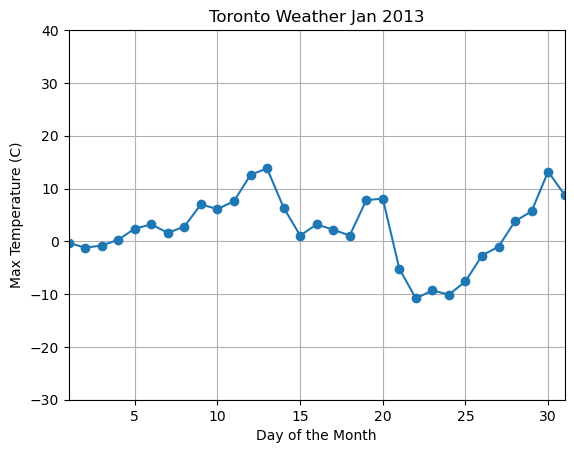

In [3]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_01-2013_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

daily = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = daily["Day"]
y_values = daily["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Jan 2013")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

### Review Hottest Summer Months

### July 2013 

Max Temp in July 2013: 34.7


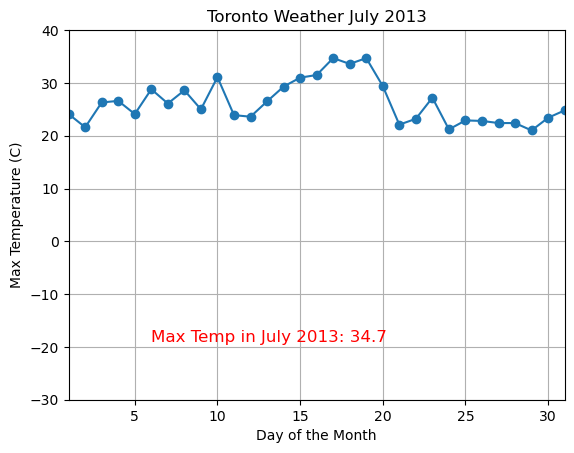

In [4]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_07-2013_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july13 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july13["Day"]
y_values = july13["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2013")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2013Max = july13["Temp"].max()
print(f"Max Temp in July 2013: {July2013Max}")
graph_text=f"Max Temp in July 2013: {July2013Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2013.png")

# Show plot
plt.show()

### July 2014 

Max Temp in July 2014: 30.0


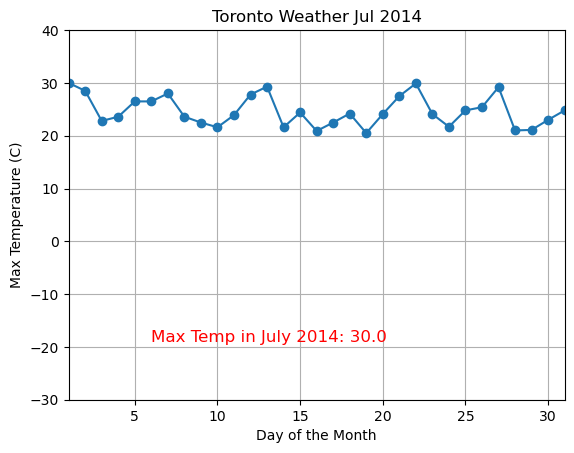

In [5]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2014/en_climate_hourly_ON_6158355_07-2014_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july14 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july14["Day"]
y_values = july14["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Jul 2014")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2014Max = july14["Temp"].max()
print(f"Max Temp in July 2014: {July2014Max}")
graph_text=f"Max Temp in July 2014: {July2014Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2014.png")

# Show plot
plt.show()

###  July 2015

Max Temp in July 2015: 32.1


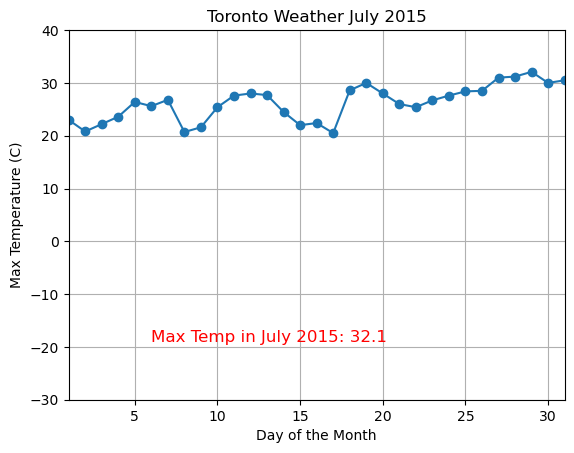

In [6]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2015/en_climate_hourly_ON_6158355_07-2015_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july15 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july15["Day"]
y_values = july15["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2015")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2015Max = july15["Temp"].max()
print(f"Max Temp in July 2015: {July2015Max}")
graph_text=f"Max Temp in July 2015: {July2015Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2015.png")

# Show plot
plt.show()

###  July 2016

Max Temp in July 2016: 34.9


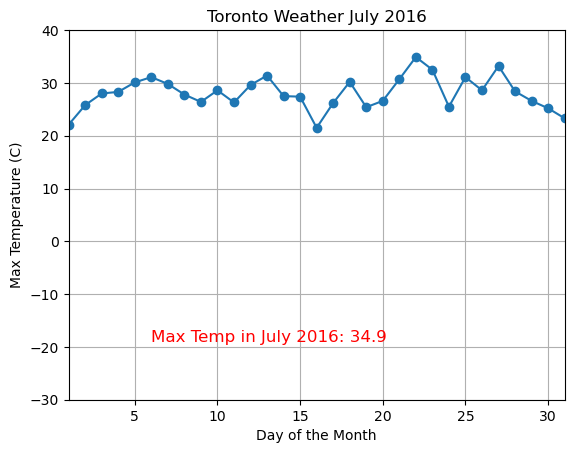

In [7]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2016/en_climate_hourly_ON_6158355_07-2016_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july16 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july16["Day"]
y_values = july16["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2016")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2016Max = july16["Temp"].max()
print(f"Max Temp in July 2016: {July2016Max}")
graph_text=f"Max Temp in July 2016: {July2016Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2016.png")

# Show plot
plt.show()

###  July 2017

Max Temp in July 2017: 30.6


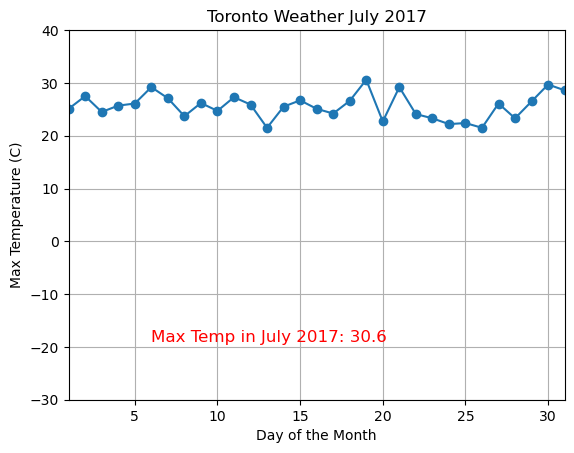

In [8]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2017/en_climate_hourly_ON_6158355_07-2017_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july17 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july17["Day"]
y_values = july17["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2017")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2017Max = july17["Temp"].max()
print(f"Max Temp in July 2017: {July2017Max}")
graph_text=f"Max Temp in July 2017: {July2017Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2017.png")

# Show plot
plt.show()

###  July 2018

Max Temp in July 2018: 32.5


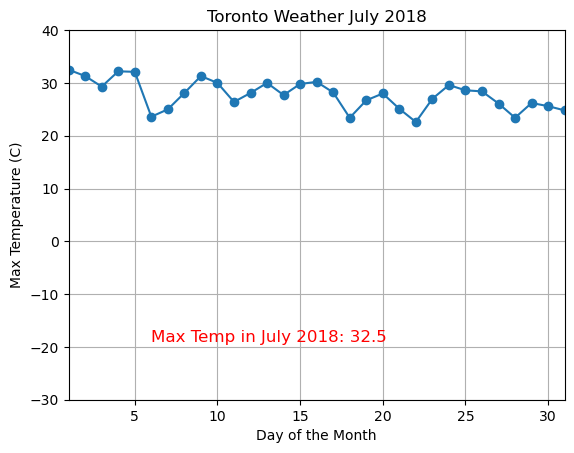

In [9]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2018/en_climate_hourly_ON_6158355_07-2018_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july18 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july18["Day"]
y_values = july18["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2018")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2018Max = july18["Temp"].max()
print(f"Max Temp in July 2018: {July2018Max}")
graph_text=f"Max Temp in July 2018: {July2018Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2018.png")

# Show plot
plt.show()

###  July 2019

Max Temp in July 2019: 33.5


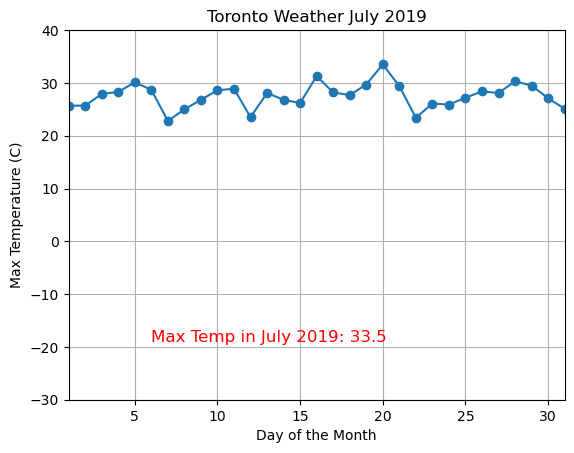

In [10]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2019/en_climate_hourly_ON_6158355_07-2019_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july19 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july19["Day"]
y_values = july19["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2019")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2019Max = july19["Temp"].max()
print(f"Max Temp in July 2019: {July2019Max}")
graph_text=f"Max Temp in July 2019: {July2019Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2019.png")

# Show plot
plt.show()

###  July 2020

Max Temp in July 2020: 34.9


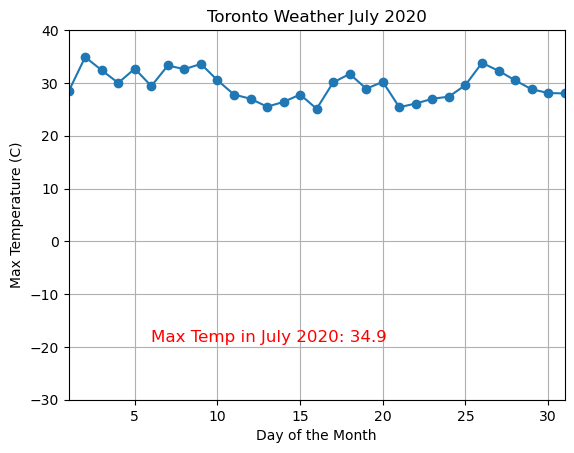

In [11]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2020/en_climate_hourly_ON_6158355_07-2020_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july20 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july20["Day"]
y_values = july20["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2020Max = july20["Temp"].max()
print(f"Max Temp in July 2020: {July2020Max}")
graph_text=f"Max Temp in July 2020: {July2020Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2020.png")

# Show plot
plt.show()

###  July 2021

Max Temp in July 2021: 32.9


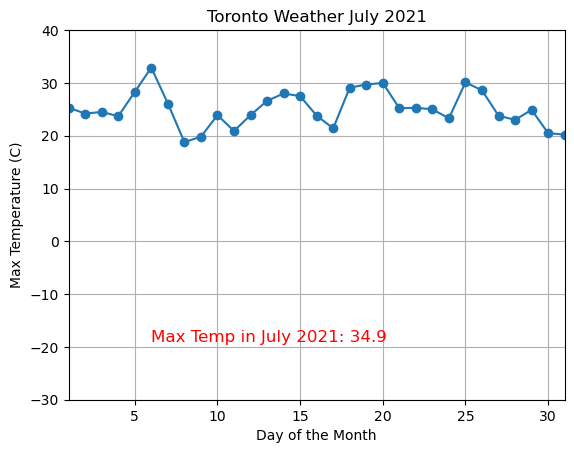

In [12]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2021/en_climate_hourly_ON_6158355_07-2021_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july21 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july21["Day"]
y_values = july21["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2021")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2021Max = july21["Temp"].max()
print(f"Max Temp in July 2021: {July2021Max}")
graph_text=f"Max Temp in July 2021: {July2020Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2021.png")

# Show plot
plt.show()

###  July 2022

Max Temp in July 2022: 33.9


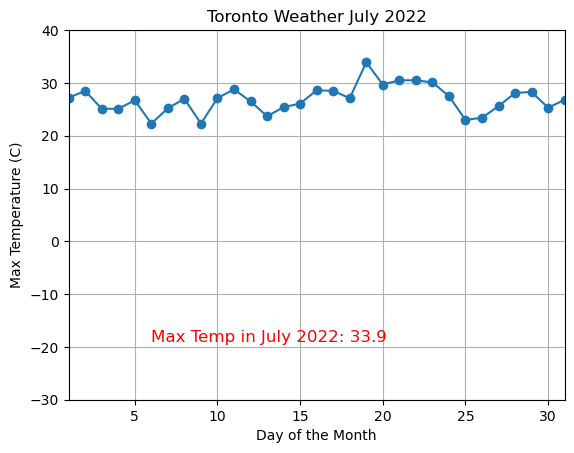

In [13]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2022/en_climate_hourly_ON_6158355_07-2022_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july22 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july22["Day"]
y_values = july22["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2022")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# text on the graph, max temp in the month
July2022Max = july22["Temp"].max()
print(f"Max Temp in July 2022: {July2022Max}")
graph_text=f"Max Temp in July 2022: {July2022Max}"
plt.annotate(graph_text, (6,-19), fontsize=12, rotation=0, color="red")

# Save the figure
plt.savefig("output_data/graphs/july2022.png")

# Show plot
plt.show()

###  Combine Max Temps In a dataframe

In [14]:

yearsNum=[0,1,2,3,4,5,6,7,8,9]

year=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

temp=[July2013Max, 
      July2014Max, 
      July2015Max, 
      July2016Max, 
      July2017Max, 
      July2018Max, 
      July2019Max, 
      July2020Max, 
      July2021Max,
      July2022Max 
     ]

last_decade = pd.DataFrame({  
                            "YearNum": yearsNum,
                            "Year":  year, 
                            "Temp":  temp, 
                           })
print(last_decade)

   YearNum  Year  Temp
0        0  2013  34.7
1        1  2014  30.0
2        2  2015  32.1
3        3  2016  34.9
4        4  2017  30.6
5        5  2018  32.5
6        6  2019  33.5
7        7  2020  34.9
8        8  2021  32.9
9        9  2022  33.9


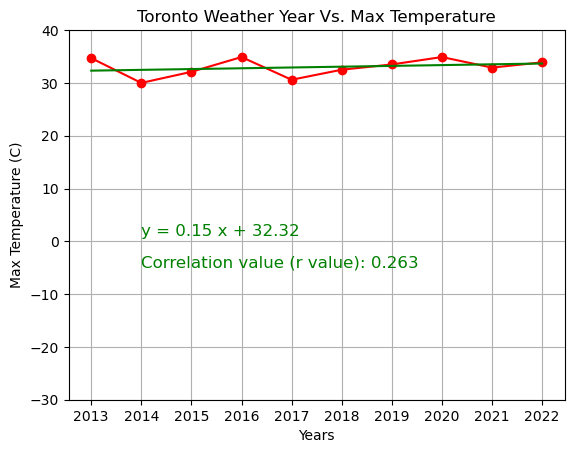

Correlation value (r value): 0.2627319134810071


In [15]:
# Extract relevant fields from the data frame
x_values = last_decade["YearNum"]
x_values = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

y_values = last_decade["Temp"]

plt.plot(x_values, y_values, "red", marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
# plt.xlim(0, 10)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Year Vs. Max Temperature")

plt.ylabel("Max Temperature (C)")
plt.xlabel("Years")
plt.grid(True)

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = last_decade["YearNum"]
y_values = last_decade["Temp"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values=x_values* slope + intercept

# line plot
plt.plot(x_values, regress_values, color='green')

# Linear equation on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (1,1), fontsize=12, rotation=0, color="green") 
text=f"Correlation value (r value): {round(rvalue,3)}"
plt.annotate(text, (1,-5), fontsize=12, rotation=0, color="green") 

# Save the figure
plt.savefig("output_data/graphs/summary.png")


# Show plot
plt.show()

print(f"Correlation value (r value): {rvalue}")

###  Fire Incidents Per Year  (in the same period of time)

In [16]:
# original data 
fire_df = pd.read_csv("FireInput/FireIncidents.csv")

fire_df

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,Year
0,1416826,74 - Storage Area (outside),NaN,NaN,0.0,0.0,1000.0,NaN,NaN,2011-01-01T00:15:59,...,NaN,NaN,NaN,NaN,NaN,5 - Flames showing from large area (more than ...,2011-01-01T00:06:48,2011-01-01T00:12:54,0.0,2011
1,1417004,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2011-01-01T02:58:00,...,NaN,NaN,NaN,NaN,NaN,9 - Unclassified,2011-01-01T02:48:16,2011-01-01T02:55:55,0.0,2011
2,1424799,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,60000.0,12.0,NaN,2011-01-01T06:03:00,...,8 - Not applicable - no smoke alarm or presenc...,9 - Undetermined,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-01-01T05:49:17,2011-01-01T05:56:57,0.0,2011
3,1424781,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,5000.0,0.0,NaN,2011-01-01T06:39:31,...,2 - Hardwired (standalone),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,1 - Fire extinguished prior to arrival,2011-01-01T06:26:15,2011-01-01T06:33:37,0.0,2011
4,1416836,83 - Electrical Systems,08 - Not Applicable,8 - Not applicable (not a business),0.0,0.0,2000.0,0.0,NaN,2011-01-01T11:44:59,...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,9 - Unclassified,2011-01-01T11:20:22,2011-01-01T11:26:37,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,1412530,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T16:36:48,2021-12-31T16:41:47,0.0,2021
25856,1412531,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T19:14:27,2021-12-31T19:18:46,0.0,2021
25857,1412532,"25 - Washroom or Bathroom (toilet,restroom/loc...",01 - Normal (no change),1 - No business interruption,0.0,0.0,1000.0,2.0,NaN,2021-12-31T19:40:28,...,9 - Type undetermined,7 - Not applicable: Occupant(s) first alerted ...,3 - Spread to entire room of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2021-12-31T19:30:28,2021-12-31T19:36:06,0.0,2021
25858,1412526,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T22:41:57,2021-12-31T22:48:52,0.0,2021


In [17]:
# select day max temperature and create 1 row per day
year      = fire_df['Year'].groupby(fire_df['Year']).mean()
fireCount = fire_df['Year'].groupby(fire_df['Year']).count()

fire_df_selected = pd.DataFrame({ "Year":       year, 
                                  "Fire Count": fireCount
                                })

fire_df_selected

,Year,Fire Count
Year,,
2011,2011.0,1811
2012,2012.0,1834
2013,2013.0,1796
2014,2014.0,1843
2015,2015.0,1816
2016,2016.0,1834
2017,2017.0,1753
2018,2018.0,3330
2019,2019.0,2948


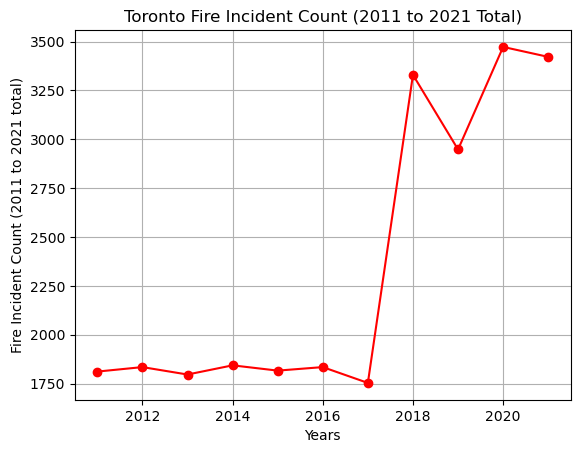

In [18]:
# Extract relevant fields from the data frame
x_values = fire_df_selected["Fire Count"]
#x_values = ['2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

y_values = fire_df_selected["Fire Count"]


plt.title("Toronto Fire Incident Count (2011 to 2021 Total)")

plt.ylabel("Fire Incident Count (2011 to 2021 total)")
plt.xlabel("Years")
plt.grid(True)


plt.plot( y_values, 'red', marker='o' ) 



# Save the figure
plt.savefig("output_data/graphs/fireIncidents.png")

# Show plot
plt.show()

###  Conclusions

In [19]:
# We were trying to corrolate "toronto weather max temperature" and "fire incidents" increases, 
# but
# rValue is too small in weather increase, and the slope of linear equation is 0.15, 
# it means slightly max temp increases over the years, 0.15 degC per year.
#
# fire count number increase too big or there is a significant jump, 
# there must be some other contributors 
# lets try to find out those main contributors


###  Lets investigate what are other main contributors to Fire Incidents

### Top 3 Contributors to Fire Incidents

In [20]:
# original data 
fire_df = pd.read_csv("FireInput/FireIncidents.csv")
fire_df

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,Year
0,1416826,74 - Storage Area (outside),NaN,NaN,0.0,0.0,1000.0,NaN,NaN,2011-01-01T00:15:59,...,NaN,NaN,NaN,NaN,NaN,5 - Flames showing from large area (more than ...,2011-01-01T00:06:48,2011-01-01T00:12:54,0.0,2011
1,1417004,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2011-01-01T02:58:00,...,NaN,NaN,NaN,NaN,NaN,9 - Unclassified,2011-01-01T02:48:16,2011-01-01T02:55:55,0.0,2011
2,1424799,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,60000.0,12.0,NaN,2011-01-01T06:03:00,...,8 - Not applicable - no smoke alarm or presenc...,9 - Undetermined,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-01-01T05:49:17,2011-01-01T05:56:57,0.0,2011
3,1424781,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,5000.0,0.0,NaN,2011-01-01T06:39:31,...,2 - Hardwired (standalone),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,1 - Fire extinguished prior to arrival,2011-01-01T06:26:15,2011-01-01T06:33:37,0.0,2011
4,1416836,83 - Electrical Systems,08 - Not Applicable,8 - Not applicable (not a business),0.0,0.0,2000.0,0.0,NaN,2011-01-01T11:44:59,...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,9 - Unclassified,2011-01-01T11:20:22,2011-01-01T11:26:37,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,1412530,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T16:36:48,2021-12-31T16:41:47,0.0,2021
25856,1412531,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T19:14:27,2021-12-31T19:18:46,0.0,2021
25857,1412532,"25 - Washroom or Bathroom (toilet,restroom/loc...",01 - Normal (no change),1 - No business interruption,0.0,0.0,1000.0,2.0,NaN,2021-12-31T19:40:28,...,9 - Type undetermined,7 - Not applicable: Occupant(s) first alerted ...,3 - Spread to entire room of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2021-12-31T19:30:28,2021-12-31T19:36:06,0.0,2021
25858,1412526,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T22:41:57,2021-12-31T22:48:52,0.0,2021


### Check "Fire Incident Count" for each "Origin of Area"

In [41]:
# Fire incident count for each Origin of Area, from 2011 to 2021 total
areaOrigin= fire_df['Year'].groupby(fire_df['Area_of_Origin'])
code= fire_df['Year'].groupby(fire_df['Area_of_Origin'])
fireCount = fire_df['Year'].groupby(fire_df['Area_of_Origin']).count()
cause = fire_df['Possible_Cause'].groupby(fire_df['Area_of_Origin']).sum()

fire_per_area_df = pd.DataFrame({ 
                                  "Fire Count": fireCount,
                                  "Possible Cause": cause
                                })

fire_per_area_df

,Fire Count,Possible Cause
Area_of_Origin,,
"11 - Lobby, Entranceway",142,99 - Undetermined99 - Undetermined45 - Imprope...
"12 - Hallway, Corridor",194,45 - Improperly Discarded52 - Electrical Failu...
"13 - Stairway, Escalator",120,45 - Improperly Discarded11 - Children Playing...
"18 - Covered Court, Atrium, mall concourse",9,45 - Improperly Discarded45 - Improperly Disca...
19 - Other Means of Egress,23,45 - Improperly Discarded45 - Improperly Disca...
...,...,...
92 - Residential/Business: Restaurant area,12,"28 - Routine maintenance deficiency, eg creoso..."
93 - Residential/Business: Other busines area,18,51 - Mechanical Failure51 - Mechanical Failure...
97 - Other - unclassified,517,"28 - Routine maintenance deficiency, eg creoso..."


### Sort "Fire Incident Count" in descending order

In [42]:
# from 2011 to 2021 total
fire_sorted_df = fire_per_area_df.sort_values(by=['Fire Count'], ascending=False)
fire_sorted_df

,Fire Count,Possible Cause
Area_of_Origin,,
24 - Cooking Area or Kitchen,3564,"44 - Unattended98 - Unintentional, cause undet..."
81 - Engine Area,2489,52 - Electrical Failure51 - Mechanical Failure...
"44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri",1336,45 - Improperly Discarded45 - Improperly Disca...
64 - Porch or Balcony,1241,"28 - Routine maintenance deficiency, eg creoso..."
"22 - Sleeping Area or Bedroom (inc. patients room, dormitory, etc)",1115,44 - Unattended47 - Improper handling of ignit...
...,...,...
"18 - Covered Court, Atrium, mall concourse",9,45 - Improperly Discarded45 - Improperly Disca...
54 - Incinerator Room,3,99 - Undetermined50 - Other misuse of ignition...
48 - Records storage area (inc vaults),2,"60 - Other unintentional cause, not classified..."


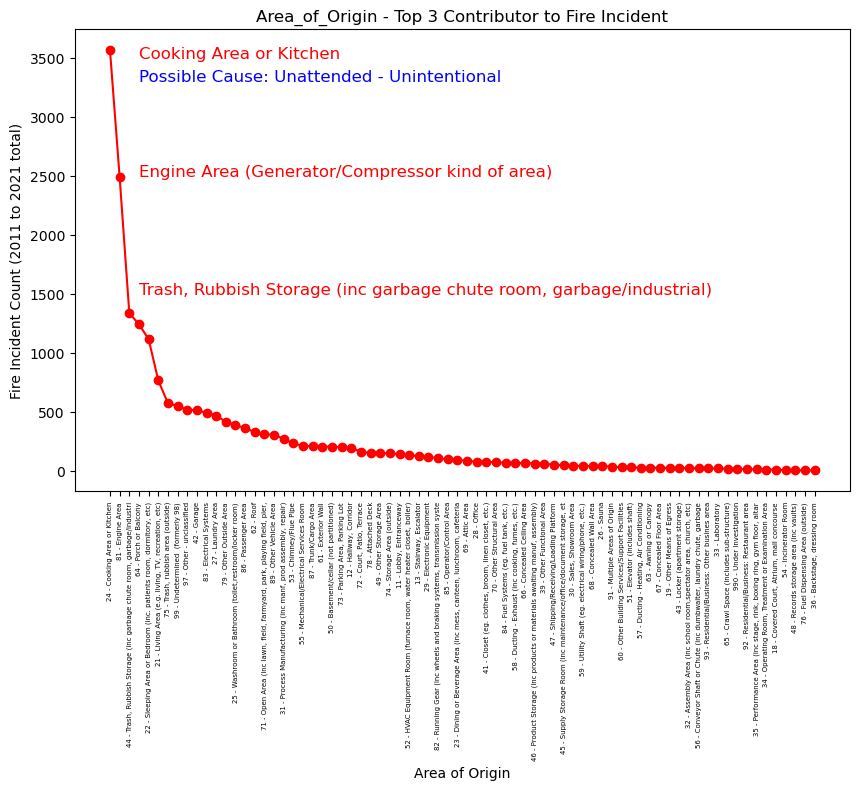

In [44]:
y_values =fire_sorted_df["Fire Count"]

# changing the size of figure to 2X2
plt.figure(figsize=(10, 6))

plt.plot( y_values, "red", marker='o') 

plt.title("Area_of_Origin - Top 3 Contributor to Fire Incident")

plt.ylabel("Fire Incident Count (2011 to 2021 total)")
plt.xlabel("Area of Origin")
plt.xticks (rotation=90, fontsize=5)

text="Cooking Area or Kitchen"
plt.annotate(text, (3,3500), fontsize=12, rotation=0, color="red") 

text="Possible Cause: Unattended - Unintentional"
plt.annotate(text, (3,3300), fontsize=12, rotation=0, color="blue") 

text="Engine Area (Generator/Compressor kind of area)"
plt.annotate(text, (3,2500), fontsize=12, rotation=0, color="red") 

text="Trash, Rubbish Storage (inc garbage chute room, garbage/industrial)"
plt.annotate(text, (3,1500), fontsize=12, rotation=0, color="red") 

# Save the figure
plt.savefig("output_data/graphs/top3contributors.png")


plt.show()

### Top 3 Contributors to Fire Incidents

In [29]:
# First 3 biggest contributors to a Fire Incident
# 24 - Cooking Area or Kitchen
# 81 - Engine Area (Generator/Compressor kind of area)
# 44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri
                      
# as we can see on the graph, first 3 contributors are way more ahead of others.

### Wiew Results in a single HTML page (This is also Presentation)

In [12]:

contents = '<!DOCTYPE html>'
contents += '<html>'

contents += '<style>'
contents += 'body {font-family: arial;}'
contents += '.photo {width:200px; border:1px solid #ccc; border-radius:10px}'
contents += '</style>'

contents += '<h2>Group7 - Project1</h2>'
contents += '<h2>Toronto Weather and Fire Analysis</h2>'

contents += '<h3>Objective</h3>'
contents += '<ul>'
contents += '<li>Review Toronto <u>maximum temperatures</u> in the last 10 years, check if increasing steadily, '
contents += '<li>Review Toronto <u>fire incident counts</u> within the same period of time , check if increasing steadily,'
contents += '<li>Try to correlate if there is a significant relation between <u>max temp increase</u> and <u>fire incident increase</u>.'
contents += '</ul>'

contents += '<h3>Our Team</h3>'
contents += '<table style="border-collapse:collapse; width:1140px">'
contents += '<tr>'
contents += '<td align="center"><img src="team/hikmet.png" class="photo"  /><br>Hikmet</td>'
contents += '<td align="center"><img src="team/tyler.png"  class="photo"  /><br>Tyler</td>'
contents += '<td align="center"><img src="team/abish.png"  class="photo"  /><br>Abish</td>'
contents += '<td align="center"><img src="team/ana.png"    class="photo"  /><br>Ana</td>'
contents += '</tr>'

contents += '</table>'
contents += '<hr>'
contents += '<h3>Data Source for Weather</h3>'
contents += '<ul>'
contents += 'Data is from Government of Canada website, Environment and Natural Resources, Weather, Climate and Hazard section.'
contents += '<br>Starting from 2013 to 2022, 120(10years*12months) csv files for each month with hourly granulation.'
contents += '<br>Total of 120 csv file. Each file is about 750rows and 30 columns'
contents += '<br>Overall data is 90000rows and 30 columns.'

contents += '<table style="border-collapse:collapse; width:1600px">'
contents += '<tr><td><img src="graphs/july2013.png" width="380px"  /></td><td><img src="graphs/july2014.png"    width="380px"  /></td><td><img src="graphs/july2015.png"  width="380px"  /></td><td><img src="graphs/july2016.png"  width="380px"  /></td><td><img src="graphs/july2017.png"  width="380px"  /></td></tr>'
contents += '<tr><td><img src="graphs/july2018.png" width="380px"  /></td><td><img src="graphs/july2019.png"    width="380px"  /></td><td><img src="graphs/july2020.png"  width="380px"  /></td><td><img src="graphs/july2021.png"  width="380px"  /></td><td><img src="graphs/july2022.png"  width="380px"  /></td></tr>'
contents += '</table>'
contents += '</ul>'


contents += '<h3>Summary of Max Temperatures of the Months</h3>'
contents += '<ul>'
contents += '<table style="border-collapse:collapse; width:1600px">'
contents += '<tr><td><img src="graphs/summary.png" width="380px"/></td> <td width="380px">The slope is positive 0.15, <br>that means: <br>max temperature is increasing 0.15 degree Celcius per year. <br> rValue is too small &lt 0.5</td> <td width="380px"></td> <td width="380px"></td> <td width="380px"></td></tr>'
contents += '</table>'
contents += '</ul>'


contents += '<hr>'
contents += '<h3>Toronto Fire Incident Counts</h3>'

contents += '<h3>Data Source for Fire</h3>'
contents += '<ul>'
contents += 'Data is from Government of Ontario website, The Office Of Fire Marshall section.'
contents += '<br>Starting from 2011 to 2021, single csv file.'
contents += '<br>25860 rows and 30 columns'

contents += '<table style="border-collapse:collapse; width:1600px">'
contents += '<tr><td><img src="graphs/fireIncidents.png" width="380px"/></td> <td width="380px">We were seeking for a correlation between <br>"max temperatures" and "fire count" <br>but there is a very week corelation<br>as you can see there is a sudden increase (almost double) after 2018</td> <td width="380px"></td> <td width="380px"></td> <td width="380px"></td></tr>'
contents += '</table>'
contents += '</ul>'


contents += '<hr>'
contents += '<h3>Top 3 Contributing Factors to Fire Incidents</h3>'
contents += '<ul>'
contents += 'Lets review Area Of Origin versus Fire Counts.<br>'
contents += 'There are 74 unique area found in input data. First 3 are way more ahead of others in terms of contribution to fire.'
contents += '<table style="border-collapse:collapse; width:1600px">'
contents += '<tr><td><img src="graphs/top3contributors.png" width="580px"/></td> <td width="380px"><h3>Conclusions</h3>We should be more careful in those areas and improve some other instruments to reduce fire risk.<br><br>After Covid more people forced to stay home and people seems like to spend more time in the kitchen. Also produced more trash.<br><br>Those fires also end up with causalties, while we are saving lives from covid, we are creating causalties due to sending people home.</td> <td width="380px"></td> <td width="380px"></td> <td width="380px"></td></tr>'
contents += '</table>'
contents += '</ul>'

contents += '<br><br><br>'
contents += '<b>Group7 - Project1</b> <br>U of T Data Analytics Bootcamp<br> Toronto, Jul 24, 2023 hello'
contents += '<br></html>'

# open and close re-writable file means clearing the existing file
# in other words, open the file and print "none" in it.
open('output_data/Toronto Weather and Fire Analysis.html', 'w').close()

# then writing contents in the lines of file
f = open("output_data/Toronto Weather and Fire Analysis.html", "a")
f.write(contents)
f.close()

In [13]:
#open and read the file after the appending:
f = open("output_data/Toronto Weather and Fire Analysis.html", "r")
print(f.read()) # just to make sure file is written as I wish

<!DOCTYPE html><html><style>body {font-family: arial;}.photo {width:200px; border:1px solid #ccc; border-radius:10px}</style><h2>Group7 - Project1</h2><h2>Toronto Weather and Fire Analysis</h2><h3>Objective</h3><ul><li>Review Toronto <u>maximum temperatures</u> in the last 10 years, check if increasing steadily, <li>Review Toronto <u>fire incident counts</u> within the same period of time , check if increasing steadily,<li>Try to correlate if there is a significant relation between <u>max temp increase</u> and <u>fire incident increase</u>.</ul><h3>Our Team</h3><table style="border-collapse:collapse; width:1140px"><tr><td align="center"><img src="team/hikmet.png" class="photo"  /><br>Hikmet</td><td align="center"><img src="team/tyler.png"  class="photo"  /><br>Tyler</td><td align="center"><img src="team/abish.png"  class="photo"  /><br>Abish</td><td align="center"><img src="team/ana.png"    class="photo"  /><br>Ana</td></tr></table><hr><h3>Data Source for Weather</h3><ul>Data is from G

In [14]:
# To be able to view the html file on the web browser, you should download "output_data" folder completely 
# then double click html file.